In [1]:
import numpy as np
import utils
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
mnist_root = './mnist'

# Q1

## a)

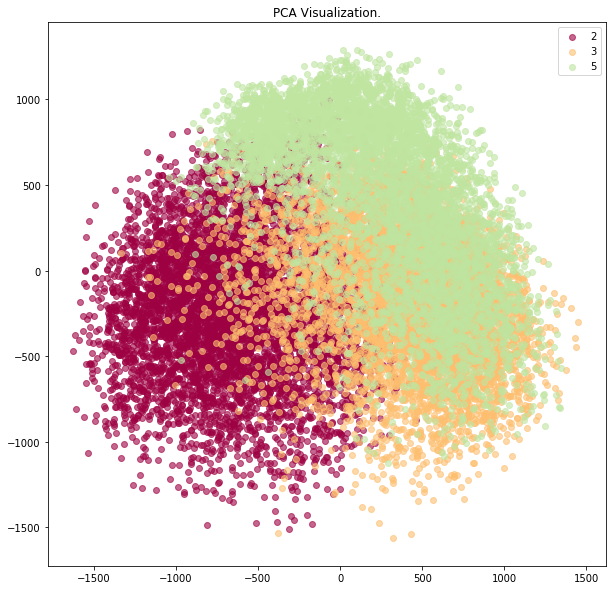

In [3]:
from Q1.PCA import PCA
specified_labels = [2,3,5]

data,label,_,_ = utils.load_mnist(mnist_root)
data,label = utils.data_filter(data,label,specified_labels)

pca = PCA(2)
pca_data = pca.fit_transform(data)
utils.scatter(pca_data, label,'PCA Visualization.')

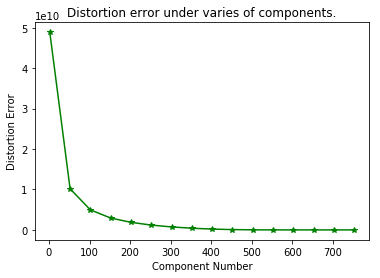

In [4]:
components = list(range(2,data.shape[1],50))
pca = PCA(2)
dist_errors = []
for _,data_rec in pca.fit_transform_components(data,components):
    dist_error = utils.distortion_error(data,data_rec)
    dist_errors.append(dist_error)
components = np.asarray(components)
dist_errors = np.asarray(dist_errors)
plt.title('Distortion error under varies of components.')
plt.plot(components,dist_errors,'-*g')
plt.xlabel('Component Number')
plt.ylabel('Distortion Error')
plt.show()

## b)

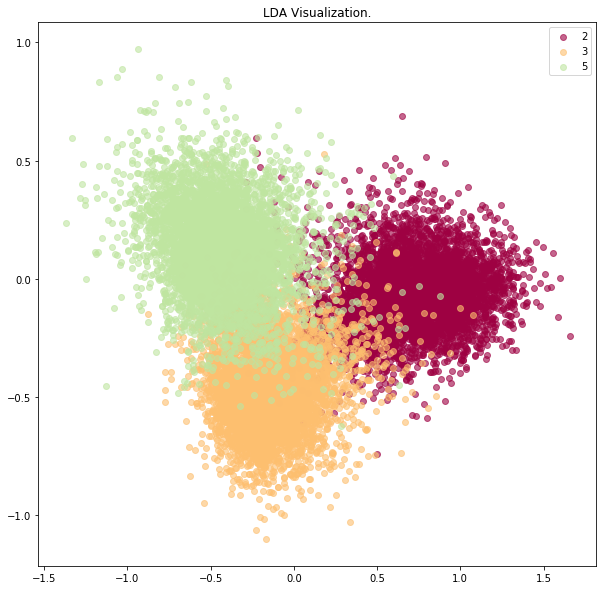

In [5]:
from Q1.LDA import LDA

lda = LDA(2)
lda_data = lda.fit_transform(data,label)
utils.scatter(lda_data, label,'LDA Visualization.')

## c)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 1500...
Computing P-values for point 500 of 1500...
Computing P-values for point 1000 of 1500...
Mean value of sigma: 2.192225
Iteration 100: error is 17.597529
Iteration 200: error is 1.427484
Iteration 300: error is 1.308858
Iteration 400: error is 1.271576
Iteration 500: error is 1.251950
Iteration 600: error is 1.243359
Iteration 700: error is 1.237996
Iteration 800: error is 1.234054
Iteration 900: error is 1.231095
Iteration 1000: error is 1.229226


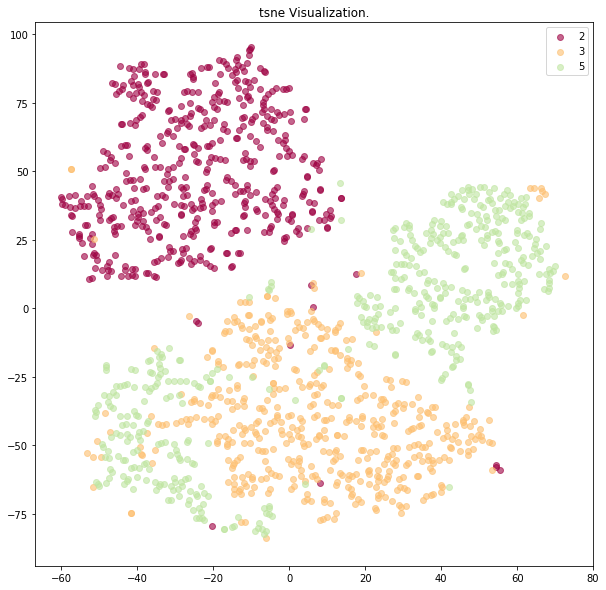

In [6]:
from Q1.tsne import tsne
sample_data,sample_label = utils.random_sample(data,label,500)
sample_data /= 255
Y = tsne(sample_data, 2, 50, 20.0)
utils.scatter(Y, sample_label, 'tsne Visualization.')

# Q2

In [11]:
from Q2.LinearRegression import LinearRegression
from Q2.LogisticRegression import LogisticRegression
from Q2.MCE import MCE

In [8]:
# prepare data
specified_labels = [3, 5]
data, label, test_data, test_label = utils.load_mnist(mnist_root)
data, label = utils.data_filter(data, label, specified_labels)
test_data,test_label = utils.data_filter(test_data,test_label,specified_labels)

In [12]:
linear_regression = LinearRegression()
linear_regression.fit(data,label)
test_pred = linear_regression.sign(test_data)
test_acc = np.sum(test_pred==test_label) / len(test_label)
print('Linear Regression Test Acc %.4f'%test_acc)

Linear Regression Test Acc 0.9653


In [13]:
logistic_regression = LogisticRegression(learning_rate=0.00001,max_iter=300)
logistic_regression.fit(data, label)
test_pred = logistic_regression.sign(test_data)
test_acc = np.sum(test_pred==test_label) / len(test_label)
print('Logistic Regression Test Acc %.4f' % test_acc)

100%|██████████| 300/300 [00:03<00:00, 98.53it/s] 

Logistic Regression Test Acc 0.9632


In [14]:
mce = MCE(learning_rate=0.00001, max_iter=300)
mce.fit(data, label)
test_pred = mce.sign(test_data)
test_acc = np.sum(test_pred==test_label) / len(test_label)
print('MCE Test Acc %.4f' % test_acc)

100%|██████████| 300/300 [00:02<00:00, 100.55it/s]

MCE Test Acc 0.9548


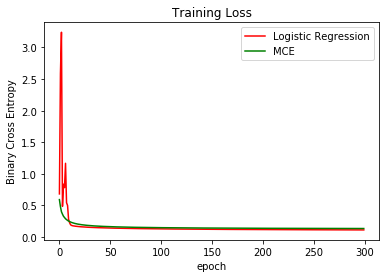

In [15]:
plt.title('Training Loss')
plt.plot(logistic_regression.loss,'r',label='Logistic Regression')
plt.plot(mce.loss,'g',label='MCE')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('Binary Cross Entropy')
plt.show()

# 3

In [1]:
from Q3.SVM import SVM,auto_scale,RBF_kernel,linear_kernel
from Q3.MultiClassSVM import MultiClassSVM

  7%|▋         | 68/1000 [00:00<00:01, 545.85it/s]


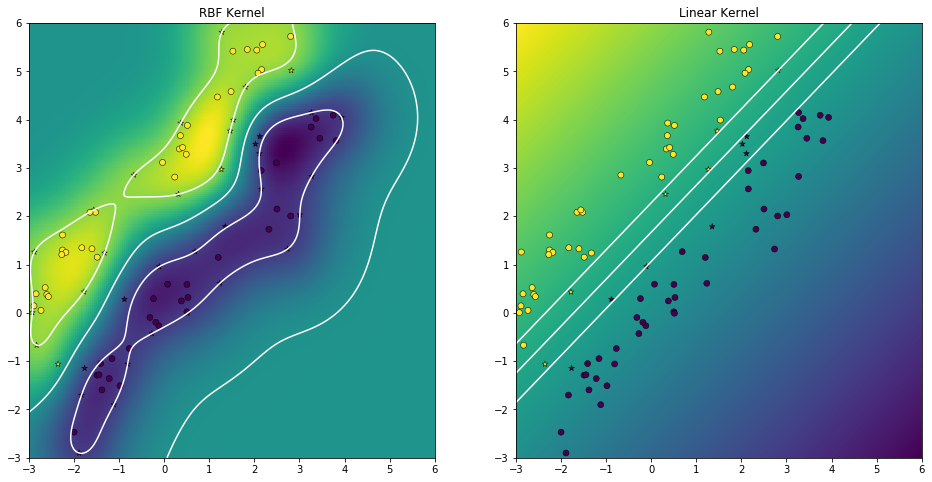

In [25]:
# plot SVM decision boundary

np.random.seed(1)
X,y = utils.generate_data(50)
kernels = [RBF_kernel(1.0),linear_kernel()]
kernels_name = ['RBF','Linear']
plt.figure(figsize=(16,8))
for i,(kernel,kn) in enumerate(zip(kernels,kernels_name)):
    plt.subplot(1,2,i+1)
    model = SVM(C=1, kernel=kernel,max_iter=1000)
    model.fit(X, y, tol=1e-5)
    sv = model.support_vectors
    plt.title('%s Kernel' % kn)
    plt.scatter(X[sv, 0], X[sv, 1], c=y[sv], marker='*',
                linewidths=0.5, edgecolors=(0, 0, 0, 1))
    plt.scatter(X[~sv, 0], X[~sv, 1], c=y[~sv],
                linewidths=0.5, edgecolors=(0, 0, 0, 1))
    xvals = np.linspace(-3, 6, 200)
    yvals = np.linspace(-3, 6, 200)
    xx, yy = np.meshgrid(xvals, yvals)

    pred = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    zz = np.reshape(pred, xx.shape)
    plt.pcolormesh(xx, yy, zz, zorder=0)
    plt.contour(xx, yy, zz, levels=(-1, 0, 1), colors='w', linewidths=1.5, zorder=1, linestyles='solid')

    plt.xlim([-3, 6])
    plt.ylim([-3, 6])
plt.show()

In [21]:
# using all data binary svm accuracy
specified_labels = [3.0, 5.0] 
data, label, test_data, test_label = utils.load_mnist(mnist_root)
data, label = utils.data_filter(data, label, specified_labels)
test_data, test_label = utils.data_filter(test_data, test_label, specified_labels)

sigma = auto_scale(data)
svm = SVM(1.0, kernel=RBF_kernel(sigma))
svm.fit(data, label)
test_pred = svm.predict(test_data)
test_acc = np.sum(test_pred == test_label) / len(test_label)
print('SVM Test Acc %.4f' % test_acc)

100%|██████████| 500/500 [19:38<00:00,  2.36s/it]


SVM Test Acc 0.9937


In [7]:
# random select 1000 samples for every class
specified_labels = [3.0, 5.0] 
data, label, test_data, test_label = utils.load_mnist(mnist_root)
data, label = utils.data_filter(data, label, specified_labels)
data, label = utils.random_sample(data,label)
test_data, test_label = utils.data_filter(test_data, test_label, specified_labels)

sigma = auto_scale(data)
svm = SVM(1.0, kernel=RBF_kernel(sigma))
svm.fit(data, label)
test_pred = svm.predict(test_data)
test_acc = np.sum(test_pred == test_label) / len(test_label)
print('SVM Test Acc %.4f, 1000 samples per class' % test_acc)

 52%|█████▏    | 259/500 [00:11<00:10, 22.02it/s]


SVM Test Acc 0.9890, 1000 samples per class


In [8]:
specified_labels = np.arange(10)
data, label, test_data, test_label = utils.load_mnist(mnist_root)
data, label = utils.random_sample(data, label)
data, label = utils.data_filter(data, label, specified_labels)
test_data, test_label = utils.data_filter(test_data, test_label, specified_labels)

In [27]:
# MultiClassSVM
svm = MultiClassSVM(1.0, kernel='rbf',classes=specified_labels)
svm.fit(data, label)
test_pred = svm.predict(test_data)
test_acc = np.sum(test_pred == test_label) / len(test_label)
print(test_acc)

SVM: 0 1


 41%|████      | 412/1000 [00:17<00:25, 22.93it/s]


SVM: 0 2


 32%|███▏      | 323/1000 [00:15<00:32, 21.04it/s]


SVM: 0 3


 37%|███▋      | 374/1000 [00:17<00:28, 21.78it/s]


SVM: 0 4


 31%|███       | 307/1000 [00:14<00:32, 21.39it/s]


SVM: 0 5


 26%|██▌       | 261/1000 [00:12<00:35, 20.67it/s]


SVM: 0 6


 34%|███▍      | 342/1000 [00:16<00:31, 20.85it/s]


SVM: 0 7


 32%|███▏      | 321/1000 [00:15<00:32, 21.16it/s]


SVM: 0 8


 31%|███▏      | 314/1000 [00:14<00:31, 22.00it/s]


SVM: 0 9


 33%|███▎      | 328/1000 [00:14<00:29, 22.55it/s]


SVM: 1 2


 62%|██████▏   | 624/1000 [00:27<00:16, 22.85it/s]


SVM: 1 3


 48%|████▊     | 480/1000 [00:20<00:22, 22.88it/s]


SVM: 1 4


 67%|██████▋   | 666/1000 [00:28<00:14, 23.15it/s]


SVM: 1 5


 38%|███▊      | 384/1000 [00:17<00:28, 21.81it/s]


SVM: 1 6


 42%|████▏     | 417/1000 [00:17<00:25, 23.27it/s]


SVM: 1 7


 37%|███▋      | 372/1000 [00:17<00:29, 21.02it/s]


SVM: 1 8


 41%|████      | 412/1000 [00:20<00:29, 20.02it/s]


SVM: 1 9


 37%|███▋      | 368/1000 [00:16<00:29, 21.66it/s]


SVM: 2 3


 27%|██▋       | 273/1000 [00:13<00:35, 20.45it/s]


SVM: 2 4


 28%|██▊       | 279/1000 [00:13<00:34, 20.70it/s]


SVM: 2 5


 25%|██▍       | 246/1000 [00:12<00:37, 20.33it/s]


SVM: 2 6


 22%|██▏       | 215/1000 [00:10<00:39, 19.86it/s]


SVM: 2 7


 28%|██▊       | 285/1000 [00:13<00:33, 21.33it/s]


SVM: 2 8


 22%|██▎       | 225/1000 [00:11<00:38, 20.15it/s]


SVM: 2 9


 28%|██▊       | 280/1000 [00:12<00:32, 21.98it/s]


SVM: 3 4


 29%|██▉       | 293/1000 [00:13<00:32, 21.74it/s]


SVM: 3 5


 24%|██▍       | 239/1000 [00:11<00:37, 20.07it/s]


SVM: 3 6


 37%|███▋      | 366/1000 [00:16<00:28, 22.02it/s]


SVM: 3 7


 30%|███       | 301/1000 [00:14<00:32, 21.46it/s]


SVM: 3 8


 26%|██▌       | 258/1000 [00:12<00:36, 20.40it/s]


SVM: 3 9


 30%|███       | 305/1000 [00:14<00:32, 21.42it/s]


SVM: 4 5


 30%|███       | 303/1000 [00:14<00:32, 21.41it/s]


SVM: 4 6


 32%|███▏      | 316/1000 [00:14<00:31, 21.78it/s]


SVM: 4 7


 32%|███▏      | 316/1000 [00:14<00:31, 21.54it/s]


SVM: 4 8


 31%|███       | 307/1000 [00:14<00:32, 21.27it/s]


SVM: 4 9


 30%|██▉       | 297/1000 [00:14<00:35, 20.07it/s]


SVM: 5 6


 29%|██▊       | 286/1000 [00:13<00:32, 21.97it/s]


SVM: 5 7


 28%|██▊       | 281/1000 [00:12<00:32, 22.18it/s]


SVM: 5 8


 20%|█▉        | 199/1000 [00:09<00:39, 20.24it/s]


SVM: 5 9


 26%|██▋       | 265/1000 [00:12<00:34, 21.01it/s]


SVM: 6 7


 28%|██▊       | 282/1000 [00:12<00:32, 22.07it/s]


SVM: 6 8


 32%|███▏      | 324/1000 [00:14<00:31, 21.64it/s]


SVM: 6 9


 33%|███▎      | 326/1000 [00:14<00:30, 21.91it/s]


SVM: 7 8


 30%|██▉       | 297/1000 [00:13<00:32, 21.82it/s]


SVM: 7 9


 32%|███▎      | 325/1000 [00:15<00:31, 21.27it/s]


SVM: 8 9


 29%|██▉       | 291/1000 [00:13<00:33, 21.46it/s]


0.9625


In [6]:
svm = MultiClassSVM(1.0, kernel='linear',classes=specified_labels,tol=1e-8)
svm.fit(data, label)
test_pred = svm.predict(test_data)
test_acc = np.sum(test_pred == test_label) / len(test_label)
print(test_acc)

  0%|          | 0/1000 [00:00<?, ?it/s]

SVM: 0 1


  0%|          | 2/1000 [00:00<01:08, 14.47it/s]

SVM: 0 2


  0%|          | 2/1000 [00:00<01:05, 15.31it/s]

SVM: 0 3


  0%|          | 2/1000 [00:00<01:01, 16.23it/s]

SVM: 0 4


  0%|          | 2/1000 [00:00<01:16, 13.02it/s]

SVM: 0 5


  0%|          | 3/1000 [00:00<01:32, 10.75it/s]

SVM: 0 6


  0%|          | 2/1000 [00:00<00:54, 18.20it/s]

SVM: 0 7


  0%|          | 4/1000 [00:00<01:00, 16.44it/s]

SVM: 0 8


  0%|          | 1/1000 [00:00<01:48,  9.24it/s]

SVM: 0 9


  0%|          | 1/1000 [00:00<01:45,  9.49it/s]

SVM: 1 2


  0%|          | 2/1000 [00:00<01:13, 13.55it/s]

SVM: 1 3


  0%|          | 3/1000 [00:00<01:30, 11.07it/s]

SVM: 1 4


  0%|          | 1/1000 [00:00<01:47,  9.26it/s]

SVM: 1 5


  0%|          | 1/1000 [00:00<01:45,  9.49it/s]

SVM: 1 6


  0%|          | 3/1000 [00:00<01:29, 11.11it/s]

SVM: 1 7


  0%|          | 1/1000 [00:00<01:52,  8.91it/s]

SVM: 1 8


  0%|          | 2/1000 [00:00<01:09, 14.33it/s]

SVM: 1 9


  0%|          | 2/1000 [00:00<01:09, 14.41it/s]

SVM: 2 3


  0%|          | 2/1000 [00:00<01:05, 15.33it/s]

SVM: 2 4


  0%|          | 3/1000 [00:00<01:35, 10.46it/s]

SVM: 2 5


  0%|          | 1/1000 [00:00<01:57,  8.52it/s]

SVM: 2 6


  0%|          | 3/1000 [00:00<01:30, 11.03it/s]

SVM: 2 7


  0%|          | 3/1000 [00:00<01:42,  9.75it/s]

SVM: 2 8


  0%|          | 1/1000 [00:00<01:50,  9.08it/s]

SVM: 2 9


  0%|          | 3/1000 [00:00<01:31, 10.91it/s]

SVM: 3 4


  0%|          | 3/1000 [00:00<01:49,  9.12it/s]

SVM: 3 5


  0%|          | 3/1000 [00:00<01:28, 11.21it/s]

SVM: 3 6


  0%|          | 3/1000 [00:00<01:32, 10.77it/s]

SVM: 3 7


  0%|          | 1/1000 [00:00<02:02,  8.14it/s]

SVM: 3 8


  2%|▏         | 15/1000 [00:01<01:08, 14.39it/s]

SVM: 3 9


  1%|          | 6/1000 [00:00<01:05, 15.19it/s]

SVM: 4 5


  0%|          | 2/1000 [00:00<01:05, 15.19it/s]

SVM: 4 6


  0%|          | 2/1000 [00:00<01:08, 14.52it/s]

SVM: 4 7


  0%|          | 2/1000 [00:00<01:02, 15.94it/s]

SVM: 4 8


  0%|          | 3/1000 [00:00<01:46,  9.35it/s]

SVM: 4 9


  0%|          | 4/1000 [00:00<01:04, 15.39it/s]

SVM: 5 6


  1%|▏         | 14/1000 [00:00<00:56, 17.56it/s]

SVM: 5 7


  0%|          | 4/1000 [00:00<01:14, 13.39it/s]

SVM: 5 8


  0%|          | 2/1000 [00:00<01:21, 12.20it/s]

SVM: 5 9


  0%|          | 2/1000 [00:00<00:56, 17.65it/s]

SVM: 6 7


  0%|          | 4/1000 [00:00<00:56, 17.76it/s]

SVM: 6 8


  0%|          | 2/1000 [00:00<01:06, 15.09it/s]

SVM: 6 9


  0%|          | 3/1000 [00:00<01:29, 11.14it/s]

SVM: 7 8


  0%|          | 1/1000 [00:00<01:53,  8.79it/s]

SVM: 7 9


  0%|          | 2/1000 [00:00<01:09, 14.43it/s]

SVM: 8 9


 97%|█████████▋| 967/1000 [00:44<00:01, 21.65it/s]


0.9111


# 4

In [3]:
from Q4.MLPClassifier import MLPClassifier,sigmoid,tanh,relu

In [4]:
specified_labels = np.arange(10)
data, label, test_data, test_label = utils.load_mnist(mnist_root)
data, label = utils.data_filter(data, label, specified_labels)
test_data, test_label = utils.data_filter(test_data, test_label, specified_labels)

  0%|          | 0/100 [00:00<?, ?it/s]

MLP Test ACC 0.9355 wiht sigmoid activation


  0%|          | 0/100 [00:00<?, ?it/s]

MLP Test ACC 0.9475 wiht tanh activation


100%|██████████| 100/100 [00:49<00:00,  2.02it/s, Training Loss=nan] 


MLP Test ACC 0.3854 wiht relu activation


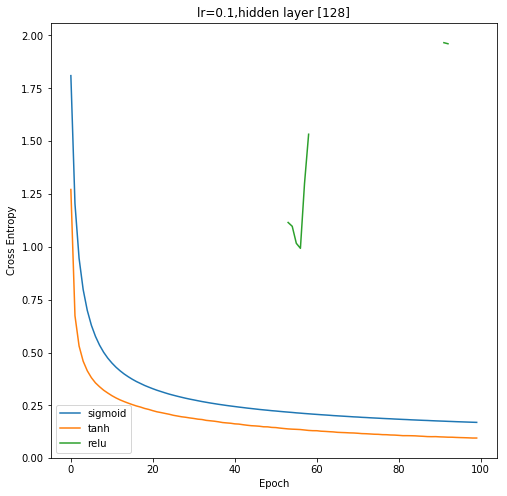

In [9]:
activtions = {
        'sigmoid': sigmoid,
        'tanh': tanh,
        'relu': relu
    }
layers = [784, 128, len(specified_labels)]
plt.figure(figsize=(8,8))
plt.title('lr=0.1,hidden layer '+ str(layers[1:-1]))
for act_name,act in activtions.items():
    mlp = MLPClassifier(activation=act,
                        net_layers=layers,
                        lr=0.01,
                        batch_size=1000,
                        max_iter=100,
                        )
    mlp.fit(data, label)
    plt.plot(mlp.loss,label=act_name)
    test_pred = mlp.predict(test_data)
    test_acc = np.sum(test_pred == test_label) / len(test_label)
    print('MLP Test ACC %.4f wiht %s activation'%(test_acc,act_name))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

MLP Test ACC 0.9325 wiht Hidden:128


  0%|          | 0/100 [00:00<?, ?it/s]

MLP Test ACC 0.9168 wiht Hidden:128, 64


100%|██████████| 100/100 [02:23<00:00,  1.43s/it, Training Loss=1.49]


MLP Test ACC 0.5345 wiht Hidden:128, 64, 32


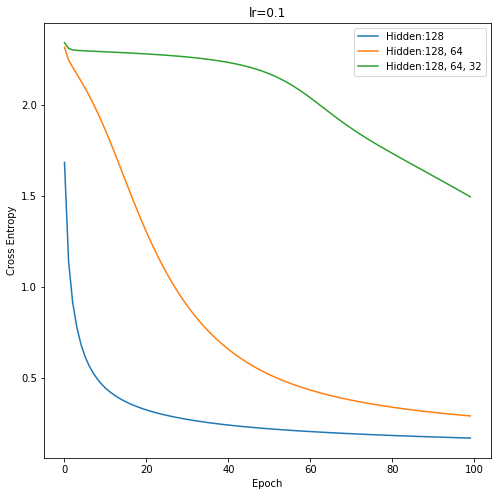

In [11]:
layers_list = [[784, 128, len(specified_labels)],
                   [784, 128, 64, len(specified_labels)],
                   [784, 128, 64, 32, len(specified_labels)],]
plt.figure(figsize=(8, 8))
plt.title('lr=0.1')
for layers in layers_list:
    mlp = MLPClassifier(activation=sigmoid,
                        net_layers=layers,
                        lr=0.01,
                        batch_size=1000,
                        max_iter=100,
                        )
    mlp.fit(data, label)
    hidden = 'Hidden:'+', '.join(map(str,layers[1:-1]))
    plt.plot(mlp.loss, label=hidden)
    test_pred = mlp.predict(test_data)
    test_acc = np.sum(test_pred == test_label) / len(test_label)
    print('MLP Test ACC %.4f wiht %s' % (test_acc, hidden))
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.show()

In [15]:
mlp = MLPClassifier(activation=sigmoid,
                        net_layers=[784,128,10],
                        lr=0.1,
                        batch_size=1000,
                        max_iter=100,
                        )
mlp.fit(data, label)
test_pred = mlp.predict(test_data)
test_acc = np.sum(test_pred == test_label) / len(test_label)
print('MLP Test ACC %.4f wiht sigmoid and lr = 0.1' % test_acc)

100%|██████████| 100/100 [01:28<00:00,  1.13it/s, Training Loss=0.0447]

MLP Test ACC 0.9687 wiht sigmoid and lr = 0.1


In [17]:
mlp = MLPClassifier(activation=sigmoid,
                        net_layers=[784,128,10],
                        lr=0.0001,
                        batch_size=1000,
                        max_iter=100,
                        )
mlp.fit(data, label)
test_pred = mlp.predict(test_data)
test_acc = np.sum(test_pred == test_label) / len(test_label)
print('MLP Test ACC %.4f wiht relu and lr = 0.0001' % test_acc)

100%|██████████| 100/100 [01:32<00:00,  1.08it/s, Training Loss=1.41]

MLP Test ACC 0.7331 wiht relu and lr = 0.0001
